In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


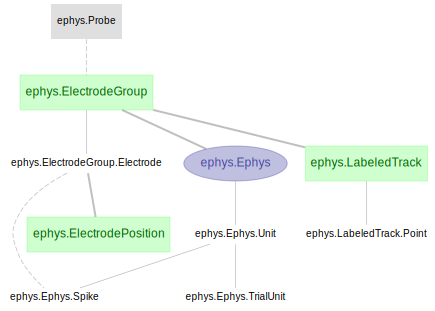

In [3]:
dj.ERD(ephys)

In [4]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

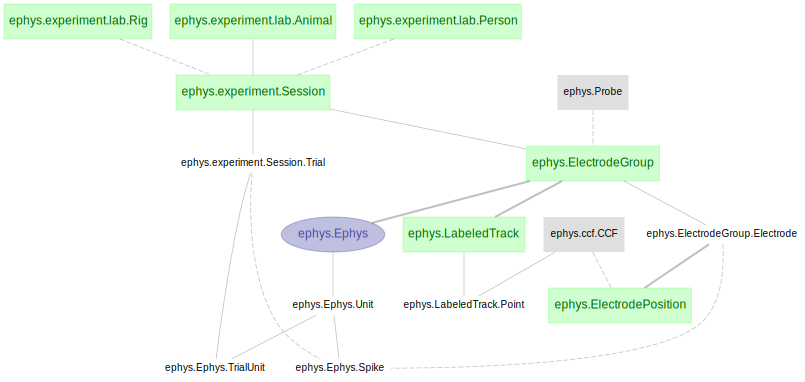

In [5]:
dj.ERD(ephys)-2

In [6]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
399752,2017-08-01
400483,2017-08-01
500483,2017-08-01


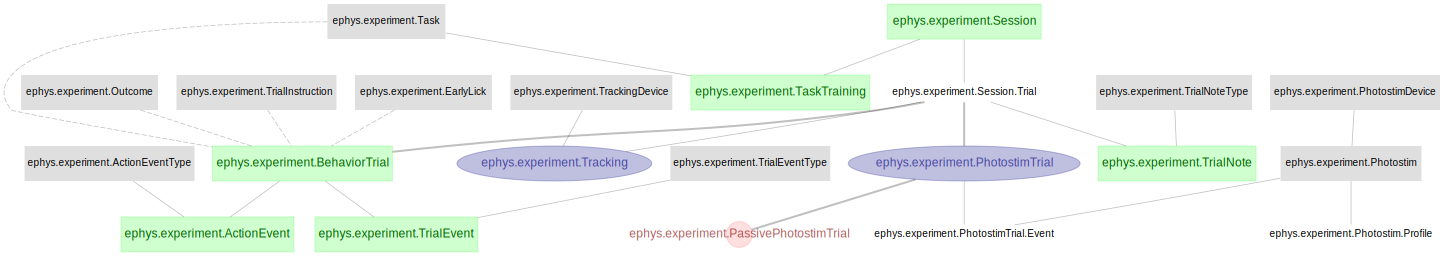

In [7]:
dj.ERD(ephys.experiment)

In [8]:
session=ephys.experiment.Session()
session

animal Janelia ANM ID (6 digits),session session number,session_date,username,rig
123456,1,2017-10-21,daveliu,RRig
399752,1,2017-11-14,daveliu,TRig1
399752,2,2017-11-16,daveliu,TRig1
399752,3,2017-11-22,daveliu,TRig1
399752,4,2017-11-23,daveliu,TRig1
399752,5,2017-11-24,daveliu,TRig1
399752,6,2017-11-26,daveliu,TRig1


In [9]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
ephys.Probe()

probe_part_no,probe_description
15131808323,neuropixels probe O3


In [11]:
eGroup=ephys.ElectrodeGroup()

In [12]:
#eGroup.insert1((123456, 1, 1, '15131808323', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [13]:
eIns=eGroup.fetch1(dj.key) # fetch the dictionary
electrode=eGroup.Electrode()

In [14]:
electrode

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,electrode sites on the electrode
123456,1,1,1
123456,1,1,2
123456,1,1,3
123456,1,1,4
123456,1,1,5
123456,1,1,6
123456,1,1,7


In [15]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [16]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['S_clu']['viClu'][0]) # index sorted by cluster
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster (unit) number
spike_times = f['viTime_spk'][0][ind] # spike times
viSite_spk = f['viSite_spk'][0][ind]
viT_offset_file = f['viT_offset_file'][:] # start of each trial
spike_trials = np.ones(len(spike_times)) * (len(viT_offset_file) - 1)
spike_times2 = np.copy(spike_times)

In [17]:
a = np.array([1, 2, 3])
b = np.copy(a)
b[a>1]=b[a>1]-1
#a

In [18]:
b

array([1, 1, 2])

In [19]:
#ephys1.drop()

In [20]:
viT_offset_file[1]

array([ 141720.])

In [21]:
spike_times[(spike_times >= viT_offset_file[1]) & (spike_times < viT_offset_file[3-1])]

array([245665, 245665, 265804, ..., 160440, 142701, 256665])

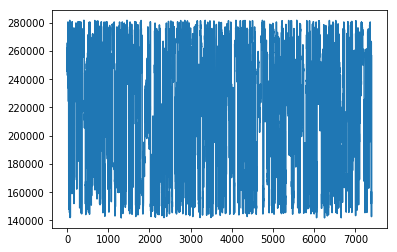

In [22]:
plt.plot(spike_times[(spike_times >= viT_offset_file[1]) & (spike_times < viT_offset_file[3-1])])

In [23]:
for i in range(len(viT_offset_file) - 1, 0, -1): #find the trials each unit has a spike in
    spike_trials[spike_times < viT_offset_file[i]] = i - 1 # Get the trial number of each spike
    spike_times2[(spike_times >= viT_offset_file[i-1]) & (spike_times < viT_offset_file[i])] = spike_times[(spike_times >= viT_offset_file[i-1]) & (spike_times < viT_offset_file[i])] - viT_offset_file[i-1] # subtract the viT_offset_file from each trial
spike_times2[spike_times >= viT_offset_file[-1]] = spike_times[spike_times >= viT_offset_file[-1]] - viT_offset_file[-1] # subtract the viT_offset_file from each trial

sRateHz = f['P']['sRateHz'][0]
clu_ids_diff = np.diff(cluster_ids)
clu_ids_diff = np.where(clu_ids_diff != 0)[0] + 1
units = np.split(spike_times, clu_ids_diff)
trialunits = np.split(spike_trials, clu_ids_diff) # sub arrays of spike_trials
unit_ids = np.arange(len(clu_ids_diff)+1)
trialunits1=[]
trialunits2=[]
for i in range(0,len(trialunits)):
    trialunits2 = np.append(trialunits2, np.unique(trialunits[i]))
    trialunits1 = np.append(trialunits1, np.zeros(len(np.unique(trialunits[i])))+i)

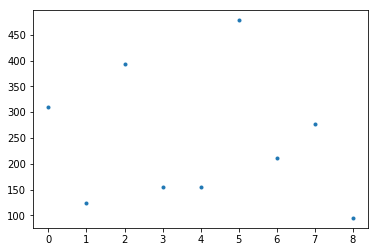

In [24]:
plt.plot(spike_trials[1:10],'.')

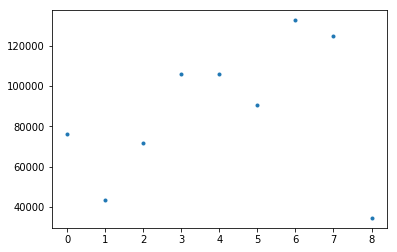

In [25]:
plt.plot(spike_times2[1:10],'.')

In [26]:
len(cluster_ids)

3312841

In [27]:
min(trialunits2)

0.0

In [28]:
session.Trial() & 'animal =123456 '

animal Janelia ANM ID (6 digits),session session number,trial,start_time (s),end_time (s)
123456,1,0,0.1000,4.6238
123456,1,1,0.1000,4.5693
123456,1,2,0.1000,6.3794
123456,1,3,0.1000,4.5894
123456,1,4,0.1000,5.9699
123456,1,5,0.1000,6.3439
123456,1,6,0.1000,4.6021


In [29]:
ephys1=ephys.Ephys()

In [44]:
# ephys1.populate()

In [31]:
# ephys1.delete()

In [45]:
spike=ephys1.Spike()

In [46]:
spike

animal Janelia ANM ID (6 digits),session session number,electrode_group Electrode_group is like the probe,unit,spike_time (s),electrode sites on the electrode,trial
123456,1,1,0,0.0001,136,18
123456,1,1,0,0.0011,64,421
123456,1,1,0,0.0016,153,288
123456,1,1,0,0.0020,153,31
123456,1,1,0,0.0021,128,72
123456,1,1,0,0.0024,101,421
123456,1,1,0,0.0031,154,331


In [59]:
unit1=(spike & 'unit = 4').fetch('spike_time')
np.size(unit1)

285

In [58]:
len(cluster_ids[cluster_ids==4])

285

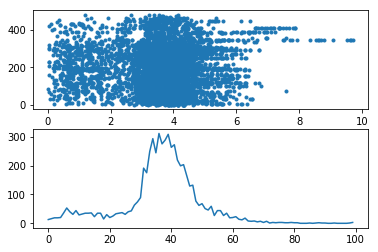

In [49]:
unit1=(spike & 'unit = 24').fetch('spike_time','trial')
plt.subplot(211)
plt.plot(unit1[0],unit1[1],'.')
psth=np.histogram(np.asarray(unit1[0], dtype='float'),100)
plt.subplot(212)
psth[0]
plt.plot(psth[0])

In [37]:
unit1[0]

array([], dtype=object)

In [38]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [39]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [40]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [41]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [42]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

NameError: name 'trialNote' is not defined

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
ephys.experiment.ActionEvent()